In [1]:
import pandas as pd

In [2]:
#load data
df = pd.read_csv('clean3.csv')
df.head()

,Nama Barang,Harga,Terjual,Rating,Lokasi,Label
0,indomie goreng 5 pc - goreng rica,15800,100,5.0,Kab. Bekasi,yes
1,Indomie Goreng 1 Dus Isi 40 pcs 85G,115000,500,5.0,Tangerang Selatan,yes
2,4+1 pcs Indomie Goreng Spesial,15000,1000,4.9,Tangerang Selatan,yes
3,indomie goreng 1dus 40pcs,110000,1000,5.0,Tangerang,yes
4,INDOMIE MIE GORENG 5 PCS,14500,500,4.8,Jakarta Barat,yes


In [3]:
#drop the variables
columns_to_drop = [0, 1, 3, 4]
df.drop(df.columns[columns_to_drop], axis=1, inplace=True)
df.head()

,Terjual,Label
0,100,yes
1,500,yes
2,1000,yes
3,1000,yes
4,500,yes


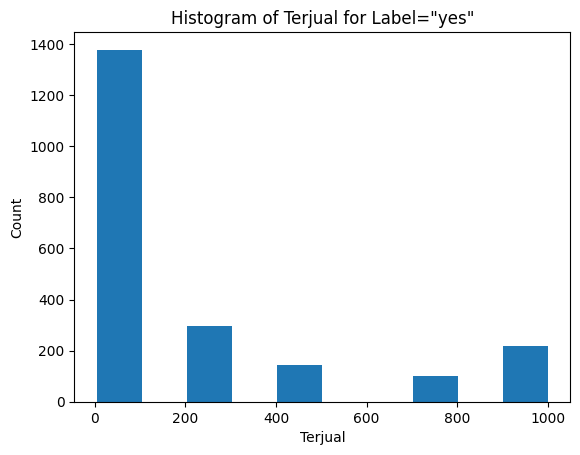

In [4]:
from matplotlib import pyplot as plt

# Filter the DataFrame for "Label" values equal to "yes"
terjual_yes = df[df["Label"] == "yes"]["Terjual"]

# Create a histogram
plt.hist(terjual_yes, bins=10)
plt.xlabel('Terjual')
plt.ylabel('Count')
plt.title('Histogram of Terjual for Label="yes"')
plt.show()


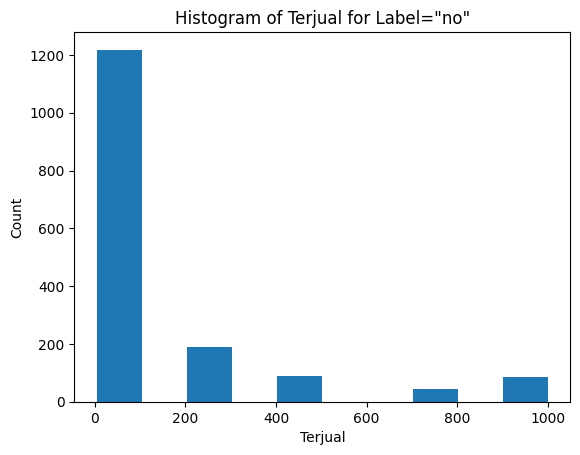

In [5]:
from matplotlib import pyplot as plt

# Filter the DataFrame for "Label" values equal to "no"
terjual_yes = df[df["Label"] == "no"]["Terjual"]

# Create a histogram
plt.hist(terjual_yes, bins=10)
plt.xlabel('Terjual')
plt.ylabel('Count')
plt.title('Histogram of Terjual for Label="no"')
plt.show()


In [7]:
from scipy import stats
import numpy as np

# Pengelompokkan berdasarkan label
group1 = df[df["Label"] == "yes"]["Terjual"]
group2 = df[df["Label"] == "no"]["Terjual"]

# Uji Kolmogorov-Smirnov pada kedua kelompok
statistic1, p_value1 = stats.kstest(group1, 'norm')
statistic2, p_value2 = stats.kstest(group2, 'norm')

# Hasil uji group-1 => produk berlabel halal
print("Kolmogorov-Smirnov Test for Group 1")
print('Test statistics:', statistic1)
print('p-value:', p_value1)

# Interpretasi hasil uji Kolmogorov-Smirnov
alpha = 0.05  # Significance level
if p_value1 > alpha:
    print("p-value >", alpha, "=> Fail to reject the null hypothesis (Data in Group 1 is approximately normally distributed)")
else:
    print("p-value <", alpha, "=> Reject the null hypothesis (Data in Group 1 is not normally distributed)")

# Hasil uji group-2 => produk tidak berlabel halal
print("\nKolmogorov-Smirnov Test for Group 2")
print('Test statistics:', statistic2)
print('p-value:', p_value2)

# Interpretasi hasil uji Kolmogorov-Smirnov
if p_value2 > alpha:
    print("p-value >", alpha, "=> Fail to reject the null hypothesis (Data in Group 2 is approximately normally distributed)")
else:
    print("p-value <", alpha, "=> Reject the null hypothesis (Data in Group 2 is not normally distributed)")


Kolmogorov-Smirnov Test for Group 1
Test statistics: 0.9999997133484281
p-value: 0.0
p-value < 0.05 => Reject the null hypothesis (Data in Group 1 is not normally distributed)

Kolmogorov-Smirnov Test for Group 2
Test statistics: 0.9999997133484281
p-value: 0.0
p-value < 0.05 => Reject the null hypothesis (Data in Group 2 is not normally distributed)


In [6]:
from scipy.stats import mannwhitneyu

# Pengelompokkan berdasarkan label
group1 = df[df["Label"] == "yes"]["Terjual"]
group2 = df[df["Label"] == "no"]["Terjual"]

# Uji Mann-Whitney U
if len(group1) > 0 and len(group2) > 0:
    statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

    print(f"Test Statistic: {statistic}")
    print(f"P-value: {p_value}")

    alpha = 0.05

    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference between the groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between the groups.")
else:
    print("Cannot perform Mann-Whitney U test. One or both groups have zero size.")

Test Statistic: 2013136.5
P-value: 1.7161226164364606e-17
Reject the null hypothesis: There is a significant difference between the groups.
